In [1]:
# sample code to load the numerical models

import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
import pandas as pd
import os
import seaborn

In [2]:
os.chdir('/home/jovyan/demo/assi2')

In [3]:
df = pd.read_csv("PIDweekly_env_data.txt", delim_whitespace=True)

# semi-artificially define seasons
# winter = DecJanFeb, spring = MarAprMay, summer = JunJulAug, autumn = SepOctNov

Mar = 31+28+1
Jun = Mar+31+30+31 # no +1 because Mar already has the +1
Sep = Jun+30+31+31
Nov = Sep+30+31+30

# tagging the seasons in a slightly dumb way
seasons = []
for i in range(df["YearDay"].size):
    day = df["YearDay"][i]
    if ( day % 365 >= Mar ) & ( day % 365 <  Jun ):
        seasons.append("spring")
    elif ( day % 365 >= Jun ) & ( day % 365 <  Sep ):
        seasons.append("summer")
    elif ( day % 365 >= Sep ) & ( day % 365 <  Nov ):
        seasons.append("autumn")
    else:
        seasons.append("winter")
        
df["seasons"] = seasons
df = df.drop(labels=["YearDay", "SampleID", "Projected_Daily_Insolation", "MLLW"], axis=1)
df.sample(10)

,Bacteria_abundance,Temp,Salinity,Oxygen_Saturation,pH,DIC,Chlorophyll,NH4,NO2.NO3,PO4,SiO4,seasons
120,1647337.278,23.00,34.78,97.7,7.94,2111.17,3.02,22.00,0.04,0.05,1.55,spring
53,1576216.216,9.10,34.00,89.4,7.89,2176.90,1.86,307.67,0.07,0.01,1.40,winter
75,4138235.294,29.10,33.00,107.2,8.01,2135.50,6.10,102.00,0.00,0.00,5.52,summer
58,3466666.667,17.70,34.00,94.9,7.89,2168.57,2.98,124.53,0.14,0.00,1.34,spring
44,2490225.564,13.60,33.00,100.1,7.95,2077.93,2.58,174.12,0.00,0.06,3.04,winter
84,3070866.142,26.00,33.00,94.7,7.99,2078.57,10.85,316.00,0.07,0.07,3.89,autumn
24,3903030.303,28.20,37.00,100.2,8.03,2114.50,4.36,142.35,0.00,0.14,1.90,summer
76,3711111.111,28.40,35.00,109.5,8.07,2109.23,6.21,104.50,0.04,0.00,2.51,summer
125,3166666.667,27.00,34.28,97.4,7.96,2066.97,6.26,18.50,0.00,0.06,3.63,summer
133,3857142.857,25.85,34.38,93.5,7.96,2091.87,6.00,89.00,0.00,0.05,6.21,summer


In [4]:
grouped = df.groupby('seasons')

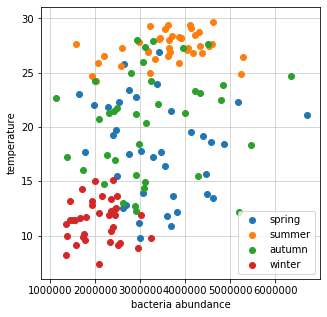

In [5]:
# sample code: scatter plots and labelling by seasons

fig = plt.figure(figsize=(5, 5))
ax = plt.axes()
for name in ["spring", "summer", "autumn", "winter"]:
    ax.scatter(df.loc[df["seasons"] == name]["Bacteria_abundance"], 
               df.loc[df["seasons"] == name]["Temp"], 
               label = name, zorder=2)  # force data to be between grid lines via larger zorder
ax.set_xlabel(f"bacteria abundance")
ax.set_ylabel(f"temperature")
ax.legend()
ax.grid(lw=0.5, zorder=0)     

In [6]:
df.corr

<bound method DataFrame.corr of      Bacteria_abundance   Temp  Salinity  Oxygen_Saturation    pH      DIC  \
0           1362561.576   8.20     32.00              99.40  7.93  1984.69   
1           2083018.868   7.40     32.00              99.80  7.92  1971.00   
2           2335241.000   9.40     32.00             102.60  7.91  1989.22   
3           2559090.909   9.30     31.00              98.30  7.90  1935.01   
4           2958974.359   8.90     32.00             104.90  7.92  1967.62   
..                  ...    ...       ...                ...   ...      ...   
146         2194444.444  14.75     32.71              92.60  7.93  2079.10   
147         1931092.437  13.15     33.43              89.50  7.94  2084.57   
148         2469902.913  12.50     32.22              90.25  7.89  2066.73   
149         2082000.000  12.10     32.39              91.65  7.92  2047.47   
150         1932283.465  12.80     32.68              90.85  7.94  2064.60   

     Chlorophyll     NH4  NO2.N

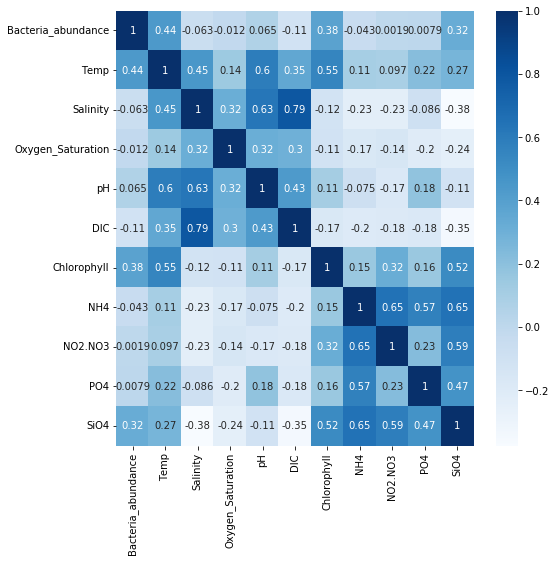

In [7]:
plt.figure(figsize=(8,8))
seaborn.heatmap(df.corr(),annot=True, cmap='Blues')

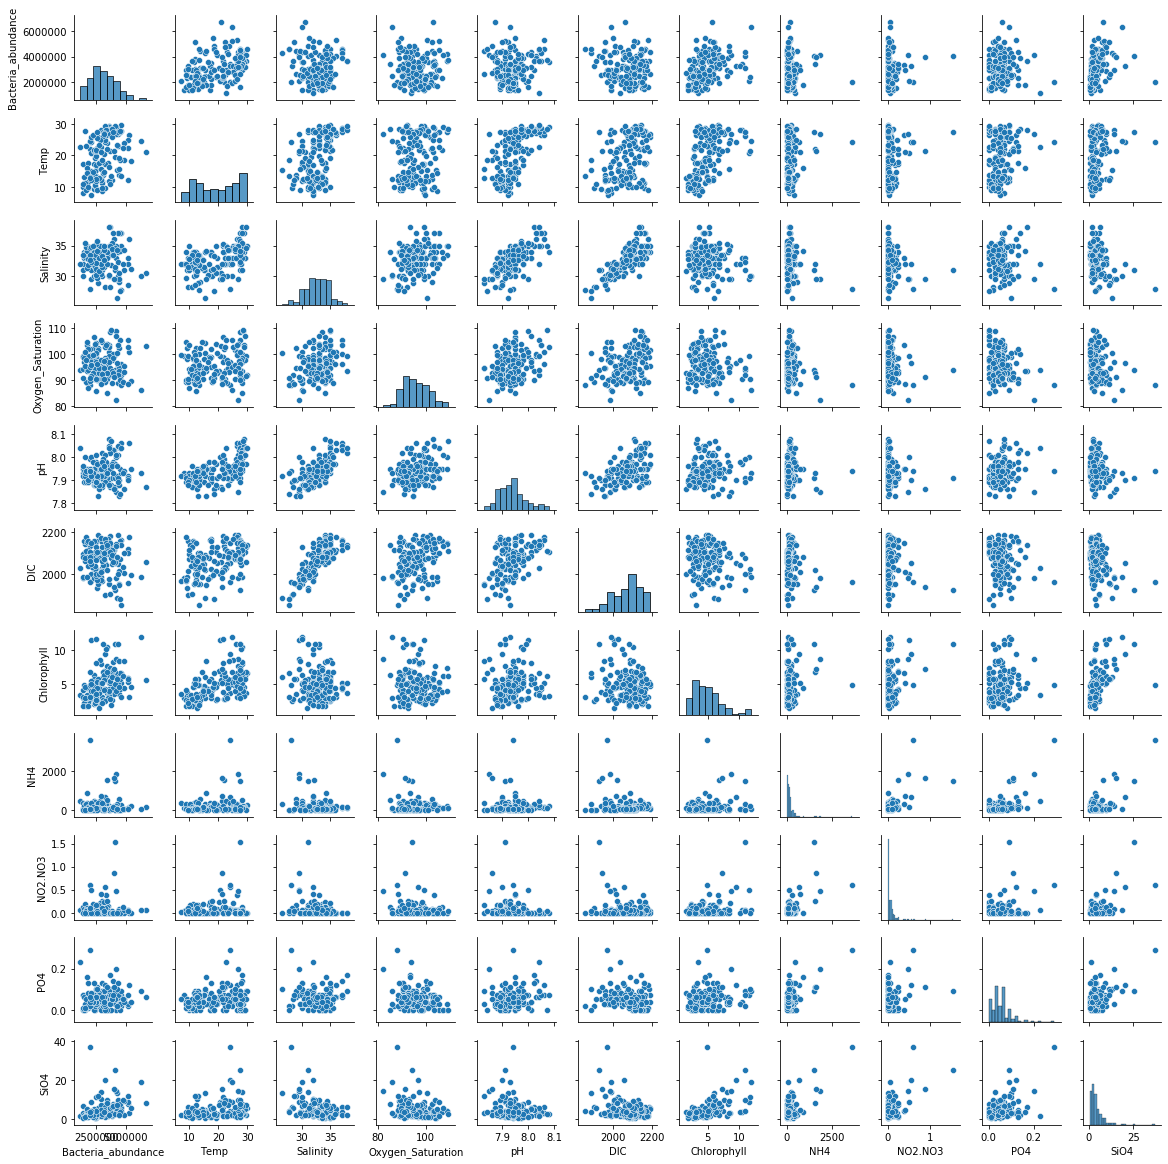

In [8]:
seaborn.pairplot(df,height=1.5)

In [9]:
df['Winter'] = np.where(df['seasons']=='winter', 1, 0)
df['Spring'] = np.where(df['seasons']=='spring', 1, 0)
df['Summer'] = np.where(df['seasons']=='summer', 1, 0)
df['Autumn'] = np.where(df['seasons']=='autumn', 1, 0)

df.drop(columns=['seasons'],axis=1,inplace=True)


In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
scaler=StandardScaler()
scaler.fit(df)
scaled_data=scaler.transform(df)

In [12]:
scaled_data

array([[-1.59784692, -1.68967711, -0.32063547, ..., -0.56970291,
        -0.60030023, -0.57989929],
       [-0.93059415, -1.8093178 , -0.32063547, ..., -0.56970291,
        -0.60030023, -0.57989929],
       [-0.69699818, -1.51021608, -0.32063547, ..., -0.56970291,
        -0.60030023, -0.57989929],
       ...,
       [-0.57228082, -1.04660842, -0.21866811, ..., -0.56970291,
        -0.60030023, -0.57989929],
       [-0.93153778, -1.10642876, -0.13987515, ..., -0.56970291,
        -0.60030023, -0.57989929],
       [-1.07019801, -1.00174316, -0.00546363, ..., -0.56970291,
        -0.60030023, -0.57989929]])

In [13]:
from sklearn.decomposition import PCA


/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True, eps=np.finfo(np.float).eps,
/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:167: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method

In [14]:
df.sample(20)

,Bacteria_abundance,Temp,Salinity,Oxygen_Saturation,pH,DIC,Chlorophyll,NH4,NO2.NO3,PO4,SiO4,Winter,Spring,Summer,Autumn
55,2344680.851,12.30,33.00,97.40,7.90,2149.30,2.55,415.06,0.05,0.00,1.43,1,0,0,0
92,3087692.308,14.40,32.82,94.90,7.95,2042.63,6.79,50.00,0.00,0.02,4.47,0,0,0,1
120,1647337.278,23.00,34.78,97.70,7.94,2111.17,3.02,22.00,0.04,0.05,1.55,0,1,0,0
46,1434653.465,13.20,33.00,96.90,7.94,2104.02,4.80,139.63,0.00,0.06,0.82,1,0,0,0
64,6709090.909,21.10,30.50,103.10,7.87,2060.23,5.65,153.00,0.06,0.06,8.25,0,1,0,0
6,3825000.000,12.20,34.00,97.90,7.91,2049.99,2.69,136.99,0.00,0.06,1.38,0,1,0,0
15,2523529.412,22.30,35.00,90.60,7.97,2157.36,2.85,103.53,0.00,0.11,2.92,0,1,0,0
21,4594285.714,27.60,37.00,96.10,8.06,2164.43,5.19,132.45,0.00,0.07,5.92,0,0,1,0
150,1932283.465,12.80,32.68,90.85,7.94,2064.60,3.10,62.50,0.11,0.06,3.49,1,0,0,0
73,3645569.620,27.30,33.50,108.80,7.95,2147.57,7.36,111.00,0.00,0.00,4.15,0,0,1,0


In [15]:
pca=PCA(n_components=2)

In [16]:
pca.fit(scaled_data)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [17]:
x_pca=pca.transform(scaled_data)

In [18]:
scaled_data.shape

(151, 15)

In [19]:
x_pca.shape

(151, 2)

Text(0, 0.5, 'Second principle component')

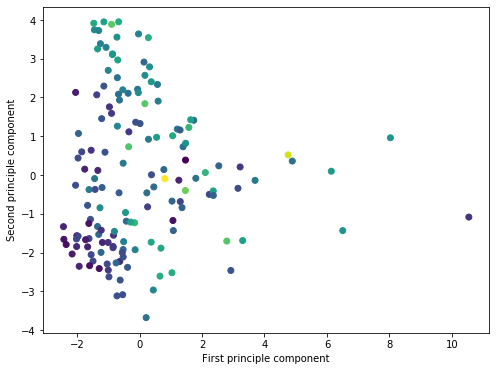

In [20]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=df['Bacteria_abundance'])
plt.xlabel('First principle component')
plt.ylabel('Second principle component')


In [21]:
import statsmodels.formula.api as smf

In [22]:
reg1='Bacteria_abundance~Temp+Salinity+Oxygen_Saturation'

In [23]:
reg1output=smf.ols(reg1,df).fit()

In [24]:
print(reg1output.summary())

                            OLS Regression Results                            
Dep. Variable:     Bacteria_abundance   R-squared:                       0.280
Model:                            OLS   Adj. R-squared:                  0.265
Method:                 Least Squares   F-statistic:                     19.03
Date:                Thu, 24 Mar 2022   Prob (F-statistic):           1.76e-10
Time:                        09:06:45   Log-Likelihood:                -2287.2
No. Observations:                 151   AIC:                             4582.
Df Residuals:                     147   BIC:                             4595.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          6.472e+06   1.57e+0

In [25]:
import math
import scipy.stats as stats

In [26]:
print(grouped.groups)

{'autumn': [31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146], 'spring': [6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120], 'summer': [17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133], 'winter': [0, 1, 2, 3, 4, 5, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 147, 148, 149, 150]}


In [27]:
summer= df[df.Summer == 1]
winter= df[df.Winter == 1]

In [28]:
a=summer['Bacteria_abundance'].values
a1=np.array([a])
at=a1.T

at.shape

(40, 1)

In [29]:
b=winter['Bacteria_abundance'].values
b1=np.array([b])
bt=b1.T

bt.shape

(36, 1)

In [30]:
stats.ttest_ind(at,bt)

Ttest_indResult(statistic=array([9.28832546]), pvalue=array([4.75682171e-14]))

I split the data based on season (summer and winter). The t-test results in a p value<0.5, which shows that the bacteria abundance in winter and summer differs in their means at a 95% confidence level.